In [11]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array
# import PyTEX

import math

# sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
sys.path.append('/nfshome/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list
     
import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []
print(sys.version)

3.6.8 (default, Apr 25 2019, 21:02:35) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-36)]


In [17]:
dirs = {}

 
dirs['displacedJetMuon_ntupler_1.root'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonNtuple/V1p7/MC_Summer16/v10/sixie/WplusH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV-powheg-pythia8/Run2_displacedJetMuonNtupler_V1p7_MC_Summer16_RunIISummer16DR80Premix-PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6-v1_v10_v1/190911_021520/0000/'
# displacedJetMuon_ntupler_1.root'
 
out_dir = '/nfshome/jmao/cms-llp/plots/20190920/'

fname = {
    'displacedJetMuon_ntupler_1.root',
        }

texs = {}

texs['displacedJetMuon_ntupler_1.root'] = 'WPlusH, MH = 125 GeV, MS = 45 GeV, ctau = 10 m'

cols = {}

cols['ndisplacedJetMuon_ntupler_1.root'] = 215


tree = OrderedDict()

f_dir = ''
for file in fname:
    print(dirs[file]+file)
 
    root_dir = uproot.open(dirs[file]+file) 
    if 'ntupler' in file:
        tree[file] = root_dir['ntuples/llp']
    else:
        tree[file] = root_dir['HggRazorLeptons']
 
    print ('Open ready')
    print(texs[file])
    print ('Tree ready') 
    print(tree[file], tree)

/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonNtuple/V1p7/MC_Summer16/v10/sixie/WplusH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV-powheg-pythia8/Run2_displacedJetMuonNtupler_V1p7_MC_Summer16_RunIISummer16DR80Premix-PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6-v1_v10_v1/190911_021520/0000/displacedJetMuon_ntupler_1.root
Open ready
WPlusH, MH = 125 GeV, MS = 45 GeV, ctau = 10 m
Tree ready
<TTree b'llp' at 0x7f5e9e20edd8> OrderedDict([('displacedJetMuon_ntupler_1.root', <TTree b'llp' at 0x7f5e9e20edd8>)])


# Debug

displacedJetMuon_ntupler_1.root <TTree b'llp' at 0x7f5e9e20edd8>
 FCN=64.2839 FROM MIGRAD    STATUS=CONVERGED      57 CALLS          58 TOTAL
                     EDM=9.53444e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.81699e+00   9.02022e-03   2.49861e-05  -8.66937e-04
   2  Slope       -9.94984e-04   6.39937e-06   1.77261e-08   1.10983e+00


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190920/decay_ctau.png has been created


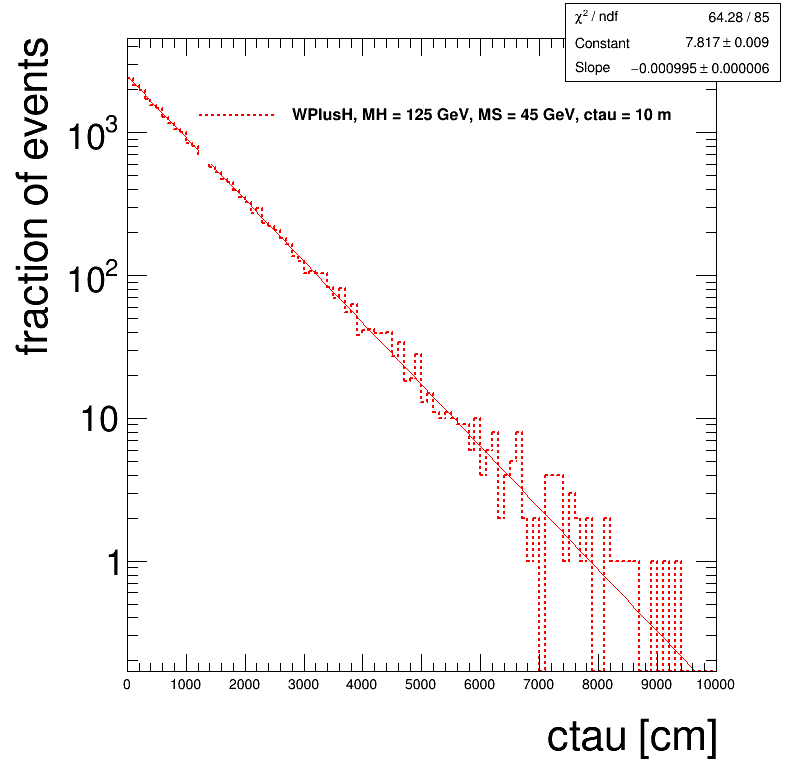

In [21]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.23,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}
hy = {}
hz = {}
hct = {}

 

for k,v in tree.items(): 
    print(k,v)
    
 
 
    if 'ntupler' in k:
    
 
        
        beta = v['gLLP_beta'].array()
 
        decay_x = v['gLLP_decay_vertex_x'].array()
        decay_y = v['gLLP_decay_vertex_y'].array()
        decay_z = v['gLLP_decay_vertex_z'].array()

#         h_x_all = decay_x.flatten()
#         h_y_all = decay_y.flatten()
#         h_z_all = decay_z.flatten()
        
#         h_beta_all = beta.flatten()
        h_x_all = decay_x[:,0]
        h_y_all = decay_y[:,0]
        h_z_all = decay_z[:,0]
        
        h_beta_all = beta[:,0]

        h_r_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_x_all, h_y_all)]
        h_d_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_r_all, h_z_all)]
        
        out_h_ct_flat = [x/y*(rt.TMath.Sqrt(1-pow(y ,2))) for x,y in zip(h_d_all, h_beta_all)]
        
    

        hct[k] = create_TH1D( out_h_ct_flat, axis_title=['ctau [cm]', 'fraction of events'], name="", binning=[100,-0,10000])
        hct[k].SetLineStyle(i+2)
        hct[k].SetLineColor(i+2)
#         hct[k].SetMarkerColor(cols[k])
        hct[k].GetXaxis().SetLabelSize(0.02)

        hct[k].Draw('same')
#         hct[k].DrawNormalized('same')
        hct[k].Fit('expo')
#         hct[k].Fit('expo','','',10,20000)
 

      

        leg.AddEntry(hct[k], texs[k])
        
 
 
        i += 1
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
# c.SetLogx()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'decay_ctau.png')